In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.3.1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Riya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('spam_ham_dataset.csv')
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
data = data.drop(['Unnamed: 0', 'label'], axis=1)

In [4]:
data.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


Text(0.5, 1.0, 'Spam/ham Data Distribution')

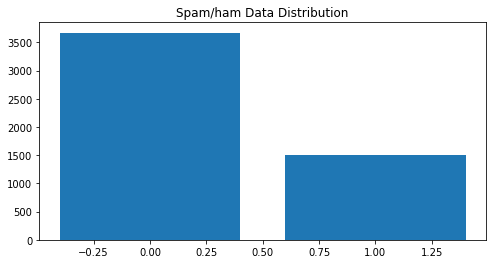

In [5]:
val_count = data.label_num.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Spam/ham Data Distribution")

In [6]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|Subject:|subject|[^A-Za-z0-9]+"

In [7]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [8]:
data.text = data.text.apply(lambda x: preprocess(x))

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.label_num == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.label_num == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

In [12]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 50

In [42]:
x = data['text']
y = data['label_num']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(x_train))
print("Test Data size", len(x_test))

Train Data size: 4136
Test Data size 1035


In [14]:
#train_data.head(10)

,text,label_num
362,hpl nom january 5 2001 see attached file hplno...,0
1078,enron hpl actuals november 1 2000 teco tap 30 ...,0
2421,ponderosa pine energy partners ltd gas brazos ...,0
2331,final cp name change merger list 08 00 attache...,0
2004,enron hpl actuals october 10 2000 teco tap 40 ...,0
4980,meter 98 9699 98 2662 receipt meters w deliver...,0
1032,fwd hi paliourg like watch real people getting...,1
2039,cp l daren handling cp l trying resolve issue ...,0
3412,please print forwarded message scott franks ji...,0
662,meter 5892 need help john childres alpine gett...,0


## TOKENIZER

In [43]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 43794


In [44]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(x_train),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (4136, 50)
Testing X Shape: (1035, 50)



## LSTM

In [17]:
#LSTM hyperparameters
n_lstm = 200
drop_lstm =0.2

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [26]:
#vocab_size = 500 # As defined earlier
embeding_dim = 16
#drop_value = 0.2 # dropout
#n_dense = 24
#num_epochs = 30
#early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [20]:
#LSTM Spam detection architecture
#model1 = Sequential()
#model1.add(Embedding(vocab_size, embeding_dim, input_length=MAX_SEQUENCE_LENGTH))
#model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
#model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
#model1.add(Dense(1, activation='relu'))

In [21]:
#model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [22]:
#num_epochs = 30
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
#history = model1.fit(x_train, train_data.label_num, epochs=num_epochs, validation_data=(x_test, test_data.label_num), verbose=2)

In [23]:
# Create a dataframe
#metrics = pd.DataFrame(history.history)
# Rename column
#metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
#                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
#def plot_graphs1(var1, var2, string):
#    metrics[[var1, var2]].plot()
#    plt.title('LSTM Model: Training and Validation ' + string)
#    plt.xlabel ('Number of epochs')
#    plt.ylabel(string)
#    plt.legend([var1, var2])
#plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
#plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [45]:
# Biderectional LSTM Spam detection architecture
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=MAX_SEQUENCE_LENGTH))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))

In [46]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [47]:
# Training
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model2.fit(x_train, y_train, epochs=num_epochs, 
                    validation_data=(x_test, y_test),callbacks =[early_stop], verbose=2)

Epoch 1/30
130/130 - 27s - loss: 0.3646 - accuracy: 0.8394 - val_loss: 0.1378 - val_accuracy: 0.9566
Epoch 2/30
130/130 - 24s - loss: 0.0530 - accuracy: 0.9857 - val_loss: 0.1056 - val_accuracy: 0.9739
Epoch 3/30
130/130 - 16s - loss: 0.0189 - accuracy: 0.9960 - val_loss: 0.1215 - val_accuracy: 0.9731
Epoch 4/30
130/130 - 16s - loss: 0.0165 - accuracy: 0.9963 - val_loss: 0.1440 - val_accuracy: 0.9773


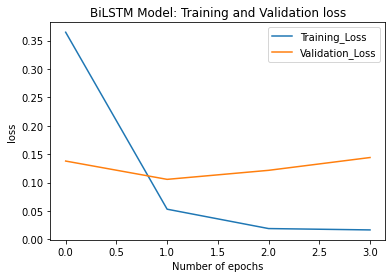

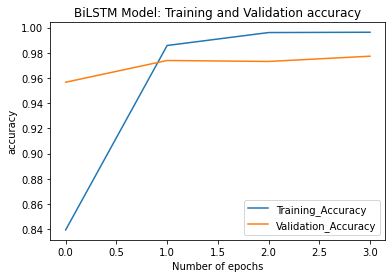

In [48]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [49]:
y_pred = model2.predict(x_test)
y_pred.shape

(1035, 50, 1)

In [37]:
train_data.label_num

362     0
1078    0
2421    0
2331    0
2004    0
       ..
4307    0
2550    1
537     1
1220    0
4271    1
Name: label_num, Length: 4136, dtype: int64

In [ ]:
from tensorflow.keras.models import load_model

#model2.save('bilstm.h5')